### Bursdagstemperaturoppgaven

1) Last inn daglig data over temperatur der du bor (landsdel eller lokalt er begge ok). Tidsserien skal spenne minst alle årene du har levd. Lag en figur av denne tidsserien. Pass på at aksene har navn, merkene på aksene har fornuftige enheter, og at figuren har en tittel. 

2) Fra denne tidsserien, lag en ny tidsserie som kun inneholder temperaturen på bursdagen din. Lag en tilsvarende figur av dette. 

3) Lag en ny figur som viser både den fulle tidsserien og tidsserien som kun inneholder temperatur på bursdagen din. Pass på at tidsvektoren (x-aksene) korresponderer. 

4) Lag en tidsserie med årsgjennomsnitt. Ta kun med de årene du har levd. Plot denne vektoren med årsgjennomsnitt sammen med temperaturen på bursdagen din. Plot altså to verdier per år - om du har bursdag i f.eks. oktober så plot likevel årsgjennomsnittet og bursdagstemperaturen på samme sted på x-aksen. Hvordan ser din tidsserie ut i forhold til årsgjennomsnittet? Er det stort sett kaldere? Varmere? Er det noen år det forskjellen er ekstrem? Er grunnen til denne ekstreme at årsgjennomsnittet eller bursdagtemperaturen skiller seg ut?

5) Beregn standarsavviket (std) til tidsserien din og til tidsserien med årsgjennomsnitt. Hvilken tidsserie har størst standardavvik? Gi en forklaring på dette utifra når på året du har bursdag. Føler du at det stemmer at std er stor/liten med din erfaring av været på bursdagen din? 

6) Dere skal nå se på gjennomsnitt av bursdagstidsseriene til alle i klassen. Dette krever litt organisering - dere må enten dele deres datasett med alle de andre i klassen, eller dere kan for eksempel sende deres tidsserie til læreren, og så kan dere gjøre resten av denne oppgaven i fellesskap. Hvordan dere kan lagre tidsserien deres som en enkel txt til som er lett å sende er forklart i denne deloppgaven. Når dette er på plass, diskuter: 
- hvor godt representerer gjennomsnittet av disse datasettene årsgjennomsnittet? 
- Tenk på hvordan fordelingen av bursdager er i klassen: Når har de fleste bursdag? Hvordan har dette påvirket resultatet over?
- Hvis dere hadde slått dere sammen med paralellklassene, hvordan ville dette datasettet representert årsgjennomsnittet? 
- Diskuter hva dere tror må til for å representere årsgjennomsnittet best mulig. 
- Se på figuren over bursdagsfordeling (i Norge?). Hvis dere hadde samlet bursdagstemperatur-tidsseriene fra alle i Norge, ville dette representert årsgjennomsnittet bedre enn det deres klasses datasett gjør? I hvilken retning går feilen?

-------------------------------

Gjør oppgaven med månedlig oppløsning nå fordi det har jeg tilgjengelig, men det blir vel best med daglige data. 


In [3]:
import numpy as np # for matematikk
import matplotlib.pyplot as plt # for figurer

import sys
# Bytt ut stien under slik at den peker på hvor på din PC du har 
# lagret mappen "Funksjoner".
sys.path.append(r"W:\Work\Documents\EkteData\EkteData\Funksjoner")
from EkteDataFunk import loadData # for filinnlasting

In [7]:
file='../data/TempBergen.txt'
data=np.genfromtxt(file,dtype=float)
data[data==-999.99]=np.nan
tid=data[:,0]
temp=data[:,1:]

Lag 2D tidsserie av måned og temp.

In [8]:
tid_mo=np.zeros(temp.shape) # 161 år, 12 måneder
#Januar er året uten noen desimaler, altså året + 1/12*0. Sett derfor kolonne 0 = tid
tid_mo[:,0]=tid
#Februar skal være året + 1/12*1, mars er året + 1/12*2 etc
for mo in range(11):
    mo+=1 # start på mo=1
    tid_mo[:,mo]=tid+1/12*mo

tid_mo=np.reshape(tid_mo,(161*12,1))
tid_mo

array([[1861.        ],
       [1861.08333333],
       [1861.16666667],
       ...,
       [2021.75      ],
       [2021.83333333],
       [2021.91666667]])

In [9]:
temp_mo=np.reshape(temp,(161*12,1))

In [10]:
temp_sept=temp[:,9]

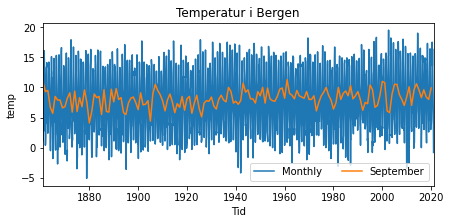

In [11]:
plt.figure(figsize=(7,3))
plt.plot(tid_mo, temp_mo, label='Monthly')
plt.plot(tid,temp_sept, label='September')
plt.legend(loc='lower right', ncol=2)
plt.xlim(tid[0], tid[-1])
plt.xlabel('Tid')
plt.ylabel('temp')
plt.title('Temperatur i Bergen')
plt.show()

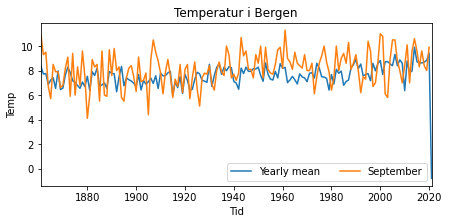

In [12]:
plt.figure(figsize=(7,3))
plt.plot(tid, np.nanmean(temp, axis=1), label='Yearly mean')
plt.plot(tid,temp_sept, label='September')
plt.legend(loc='lower right', ncol=2)
plt.xlim(tid[0], tid[-1])
plt.xlabel('Tid')
plt.ylabel('Temp')
plt.title('Temperatur i Bergen')
plt.show()

Det siste datapunktet til årsgjennomsnittet ser litt rart ut. Hvorfor er det så kaldt? Inspiser datasettet. 

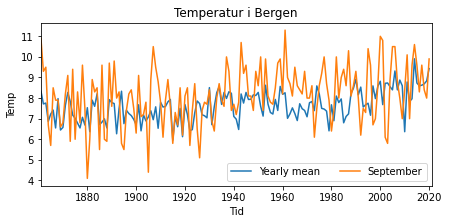

In [13]:
plt.figure(figsize=(7,3))
plt.plot(tid[:-1], np.nanmean(temp[:-1,:], axis=1), label='Yearly mean')
plt.plot(tid,temp_sept, label='September')
plt.legend(loc='lower right', ncol=2)
plt.xlim(tid[0], tid[-1])
plt.xlabel('Tid')
plt.ylabel('Temp')
plt.title('Temperatur i Bergen')
plt.show()

In [14]:
np.nanstd(np.nanmean(temp[:-1,:], axis=1))

0.7350653423327863

In [15]:
np.nanstd(temp_sept)

1.407741431336025

Oppskrift på å lage og lagre et datasett som en .txt-fil:

In [16]:
outfile='bursdagstemperatur_0710.txt' # Navn på filen du vil lage
path='C:/Users/vdu001/Documents/EkteData/' # Sti til mappen du vil lagre filen i
with open(path+outfile, 'w') as f: # Lag filen med skrivetilgang ('w' for write)
        # legg på en header
        f.write('Year' + ',' + 'Temperatur' + '\n') # Legg til en header øverst
        for i in range(len(tid)):
            f.write(str(tid[i]) + ',' + str(temp_sept[i]) + '\n') # Skriv en og en rad med år og temperatur.

For å laste inn filen igjen gjør du slik:

In [17]:
file=path+outfile
data = np.genfromtxt(file, dtype=float, delimiter=',',skip_header=1)

For å laste inn alle filene og sette dem sammen for å beregne gjennomsnittet i klassen bør man bruke en for-løkke på innlastningen og så stack, tile eller concatenate for å sette temperatur-verdiene sammen til en matrise som man så kan ta gjennomsnittet over. For at for-løkken for innlastning skal bli enklest mulig er det best om alle bruker samme format på navnet til filene sine. Kall dem "bursdagstemperatur_DDMM" og last alle filene opp i samme mappe. 

In [18]:
infile='bursdagstemperatur_' +  + '.txt'

TypeError: bad operand type for unary +: 'str'

In [19]:
import glob

In [ ]:
help(glob)